# KNN (max, min, selected, full columns)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("formated_data_1111.csv")
data.head()

# Min_Max scaler for GDP
data['GDP'] = (data['GDP per capita'] - 
               data['GDP per capita'].min())/(data['GDP per capita'].max() - data['GDP per capita'].min())

data_1 = data[['intern_num','max_sal','min_sal','GDP per capita','GDP','month_num','day','2000','500-2000','50-500','<50','互联网','教育','房产','广告','金融','企业服务','快消','电子','医疗','汽车']]
data_1

#确定 X和 y

X = data_1[['intern_num','GDP per capita','month_num','day','2000','500-2000','50-500','<50','互联网','教育','房产','广告','金融','企业服务','快消','电子','医疗','汽车']]
y = data_1['max_sal']

## 1.1 Max Salary for selected columns

(array([1004.,    0.,    0., 1545.,    0.,    0., 1434.,    0.,    0.,
         967.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

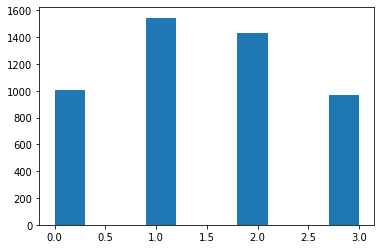

In [2]:
# Label the max salary (4 classes)

label = []
max_sal = data['max_sal'].to_numpy()
for i in max_sal:
    if i in range(0,150):
        label.append(0)
    elif i in range(150,175):
        label.append(1)
    elif i in range(175,250):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Divide into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

0.5070707070707071


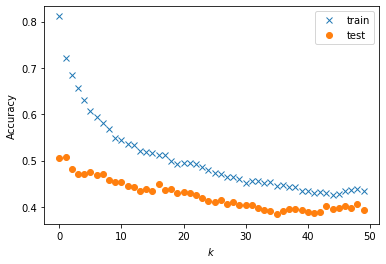

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_train = []
acc_test  = []

for i in range(1,51):
    model = KNeighborsClassifier(i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc_test.append(accuracy_score(y_pred,y_test))
    y_pred = model.predict(X_train_scaled)
    acc_train.append(accuracy_score(y_pred,y_train))
    
%matplotlib inline

plt.plot(acc_train,'x',label="train");
plt.plot(acc_test,'o',label="test");
plt.xlabel('$k$'); plt.ylabel('Accuracy')
plt.legend();
print(max(acc_test))

## 1.2 Min Salary for selected columns

In [5]:
#For min Salary

(array([ 659.,    0.,    0., 1550.,    0.,    0.,  872.,    0.,    0.,
        1869.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

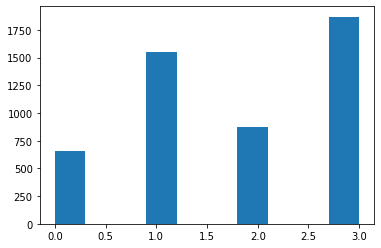

In [6]:
label = []
min_sal = data['min_sal'].to_numpy()
for i in min_sal:
    if i in range(0,100):
        label.append(0)
    elif i in range(100,120):
        label.append(1)
    elif i in range(120,150):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

0.5363636363636364


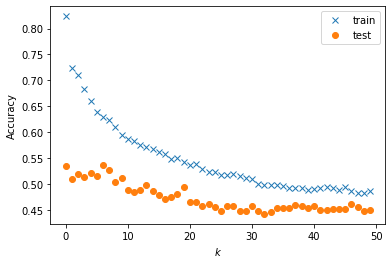

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

acc_train = []
acc_test  = []

for i in range(1,51):
    model = KNeighborsClassifier(i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc_test.append(accuracy_score(y_pred,y_test))
    y_pred = model.predict(X_train_scaled)
    acc_train.append(accuracy_score(y_pred,y_train))
    
%matplotlib inline

plt.plot(acc_train,'x',label="train");
plt.plot(acc_test,'o',label="test");
plt.xlabel('$k$'); plt.ylabel('Accuracy')
plt.legend();
print(max(acc_test))

## 2.1 Max Salarey for all columns

In [9]:
# Try full columns

In [10]:
data = pd.read_csv("formated_data_1111.csv")
data2 = data.drop(['max_sal', 'min_sal', 'city','GDP(billion)', 'Population(thousand)'], axis = 1)
data2

,intern_num,month_num,day,2000,500-2000,50-500,<50,互联网,教育,房产,...,媒体,内容,专员,产品,销售,开发,工程师,助理,运营,GDP per capita
0,176,3,3,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,162518.5736
1,390,3,5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,162518.5736
2,44,5,4,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,162518.5736
3,486,4,5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,162518.5736
4,390,3,5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,162518.5736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,73,6,5,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,169782.5765
4946,96,3,5,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,169782.5765
4947,96,3,5,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,169782.5765
4948,96,3,5,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,169782.5765


In [11]:
X = data2
y = data['max_sal']

(array([1004.,    0.,    0., 1545.,    0.,    0., 1434.,    0.,    0.,
         967.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

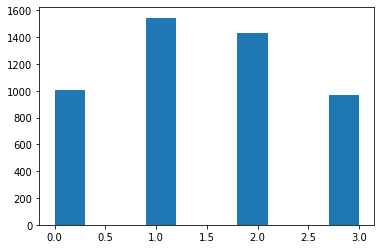

In [12]:
# Label the max salary (4 classes)

label = []
max_sal = data['max_sal'].to_numpy()
for i in max_sal:
    if i in range(0,150):
        label.append(0)
    elif i in range(150,175):
        label.append(1)
    elif i in range(175,250):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [13]:
# Divide into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

0.4202020202020202


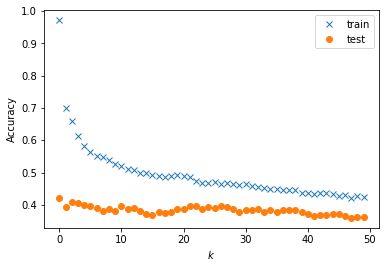

In [14]:
acc_train = []
acc_test  = []

for i in range(1,51):
    model = KNeighborsClassifier(i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc_test.append(accuracy_score(y_pred,y_test))
    y_pred = model.predict(X_train_scaled)
    acc_train.append(accuracy_score(y_pred,y_train))
    
%matplotlib inline

plt.plot(acc_train,'x',label="train");
plt.plot(acc_test,'o',label="test");
plt.xlabel('$k$'); plt.ylabel('Accuracy')
plt.legend();
print(max(acc_test))

## 2.2 Min Salarey for all columns

(array([ 659.,    0.,    0., 1550.,    0.,    0.,  872.,    0.,    0.,
        1869.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

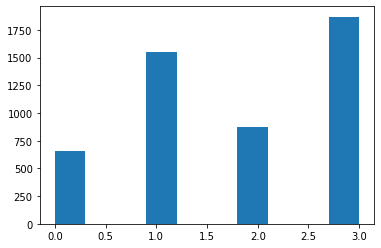

In [15]:
label = []
min_sal = data['min_sal'].to_numpy()
for i in min_sal:
    if i in range(0,100):
        label.append(0)
    elif i in range(100,120):
        label.append(1)
    elif i in range(120,150):
        label.append(2)
    else:
        label.append(3)
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

0.4535353535353535


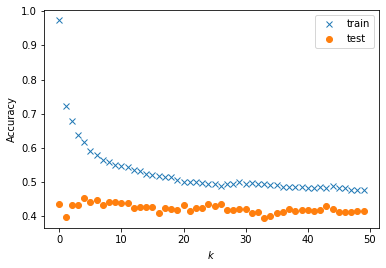

In [17]:
acc_train = []
acc_test  = []

for i in range(1,51):
    model = KNeighborsClassifier(i)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc_test.append(accuracy_score(y_pred,y_test))
    y_pred = model.predict(X_train_scaled)
    acc_train.append(accuracy_score(y_pred,y_train))
    
%matplotlib inline

plt.plot(acc_train,'x',label="train");
plt.plot(acc_test,'o',label="test");
plt.xlabel('$k$'); plt.ylabel('Accuracy')
plt.legend();
print(max(acc_test))